In [1]:

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import datetime as dt

plt.style.use('seaborn-deep')

%matplotlib inline

sns.set()


In [2]:

df = pd.read_csv("../../../Data/DataRaw/set_kills.csv")
df_info = pd.read_csv("../../../Data/DataRaw/set_matchInfo.csv")

df = df.drop(columns='Unnamed: 0')

In [3]:
df

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,1/24/2015
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,1/24/2015
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,1/24/2015
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,1/24/2015
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,1/24/2015
...,...,...,...,...,...,...,...,...,...,...,...,...
191064,https://matchhistory.na.leagueoflegends.com/en...,rKills,35.086,TTC Papryze,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,6424,9256,1/28/2018
191065,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.706,TTC Low,LGC Raid,LGC Ceres,LGC Sybol,LGC Decoy,NaN,1464,2974,1/28/2018
191066,https://matchhistory.na.leagueoflegends.com/en...,rKills,40.711,TTC Swathe,LGC Claire,LGC Ceres,LGC Sybol,LGC Raid,LGC Decoy,1014,4828,1/28/2018
191067,https://matchhistory.na.leagueoflegends.com/en...,rKills,41.113,TTC Tilting,LGC Claire,LGC Ceres,LGC Sybol,NaN,NaN,693,2924,1/28/2018


In [4]:
df_total = df.merge(df_info,right_on="Address",left_on="Address",how="left")
df_total.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,...,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,...,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,...,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,...,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,...,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,...,Balls,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh


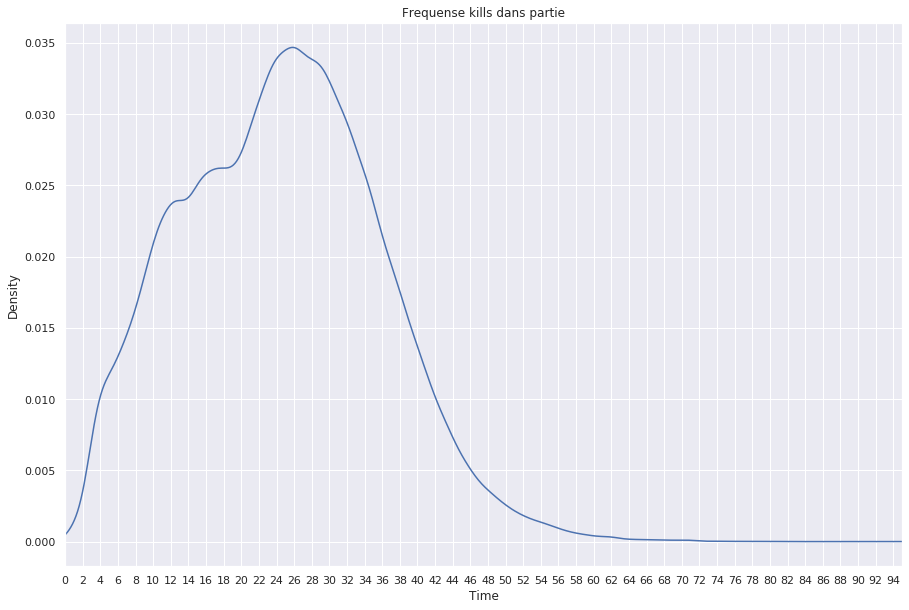

In [5]:

plt.figure(figsize=(15,10))
plt.title("Frequense kills dans partie")
plt.xticks(np.arange(0, int(df.Time.max())+1,2))
plt.xlim([0,int(df.Time.max()+1)])

plt.xlabel("Time")
plt.ylabel("frequense")
df.Time.plot.kde()

plt.show()


In [6]:
df_killmoyenParPartie = pd.DataFrame(df.Address.value_counts())
df_killmoyenParPartie = df_killmoyenParPartie.reset_index()
df_killmoyenParPartie.columns = ["Address", "Nb_kills"]

In [7]:
df_killmoyenParPartie.Nb_kills.mean()

25.074671916010498

In [8]:
df_info.gamelength.mean()

37.01259842519685

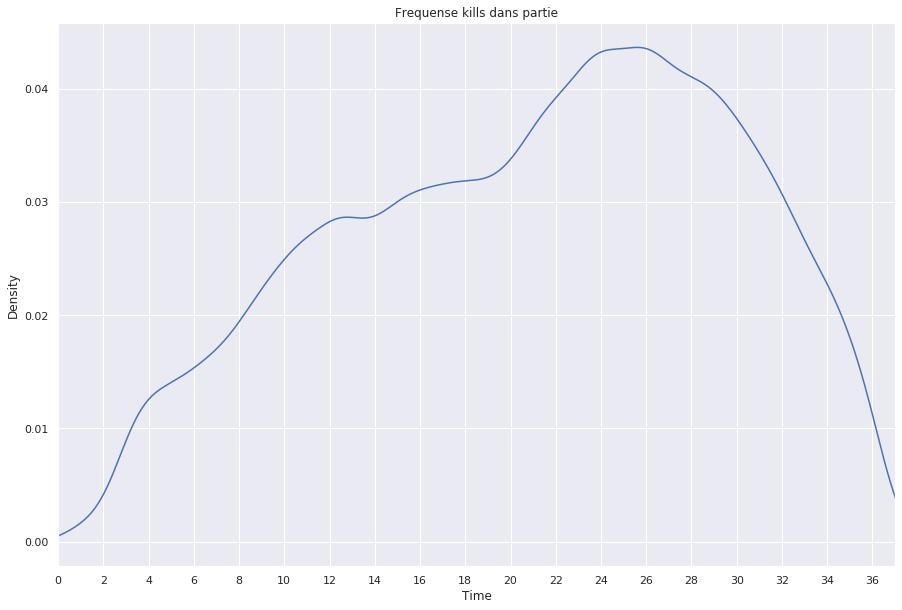

In [9]:
df_tempo = df[df.Address.isin(df_info[df_info.gamelength <= int(df_info.gamelength.mean())].Address)]

plt.figure(figsize=(15,10))
plt.title("Frequense kills dans partie")
plt.xticks(np.arange(0, int(df_tempo.Time.max())+1,2))
plt.xlim([0,int(df_tempo.Time.max()+1)])
plt.xlabel("Time")
plt.ylabel("Densier de kill")
df_tempo.Time.plot.kde()

plt.show()


In [10]:
# 25 kills repartie sur 37 minutes
# ca donne a peut pres 1 kills toute les 1 minutes et 28 secondes
#Il faudrait tenir compte de la frequence.



In [11]:
df_RapportKillsTemp = df_killmoyenParPartie.merge(df_info[["Address","gamelength"]],right_on="Address",left_on="Address",how="left")



In [12]:
df_RapportKillsTemp

,Address,Nb_kills,gamelength
0,http://matchhistory.tr.leagueoflegends.com/tr/...,109,38
1,http://matchhistory.tr.leagueoflegends.com/tr/...,94,32
2,http://matchhistory.na.leagueoflegends.com/en/...,79,32
3,http://matchhistory.las.leagueoflegends.com/es...,78,47
4,http://matchhistory.na.leagueoflegends.com/en/...,70,34
...,...,...,...
7615,http://matchhistory.lan.leagueoflegends.com/es...,5,30
7616,http://matchhistory.na.leagueoflegends.com/en/...,5,31
7617,http://matchhistory.tr.leagueoflegends.com/tr/...,5,32
7618,http://matchhistory.euw.leagueoflegends.com/en...,4,48


In [13]:
df_RapportKillsTemp[["gamelength","Nb_kills"]]

,gamelength,Nb_kills
0,38,109
1,32,94
2,32,79
3,47,78
4,34,70
...,...,...
7615,30,5
7616,31,5
7617,32,5
7618,48,4


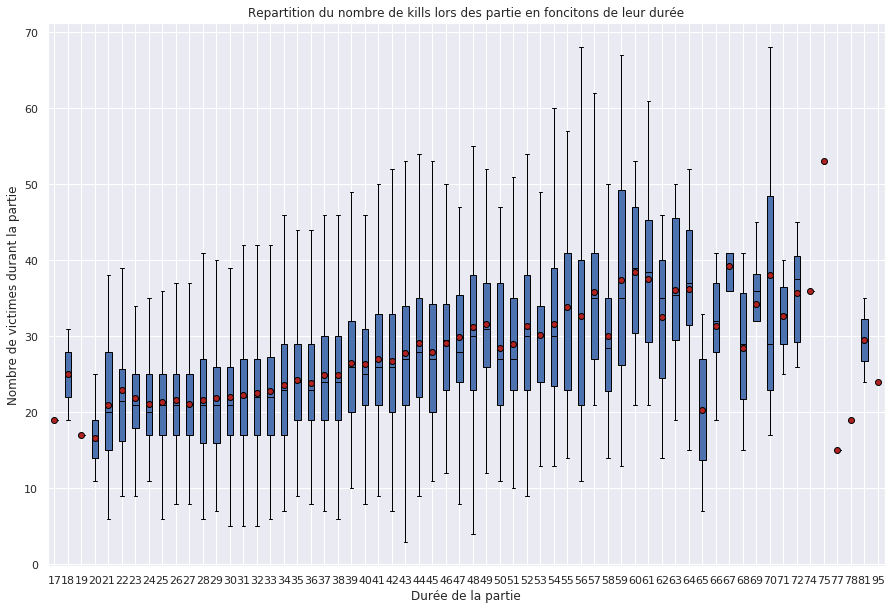

In [14]:
plt.figure(figsize=(15,10))
plt.title("Repartition du nombre de kills lors des partie en foncitons de leur durée")
plt.xlabel("Durée de la partie")
plt.ylabel("Nombre de victimes durant la partie")

medianprops = {'color':"black"}

meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

Y = 'Nb_kills'
X = 'gamelength'

sous_echantillon = df_RapportKillsTemp[['gamelength','Nb_kills']]
groupesCorr = []

modalites = np.sort(df_RapportKillsTemp.gamelength.unique())

for m in modalites:
    groupesCorr.append(sous_echantillon[sous_echantillon[X]==m][Y])

    


plt.boxplot(groupesCorr, labels=modalites, showfliers=False, medianprops=medianprops,
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()
